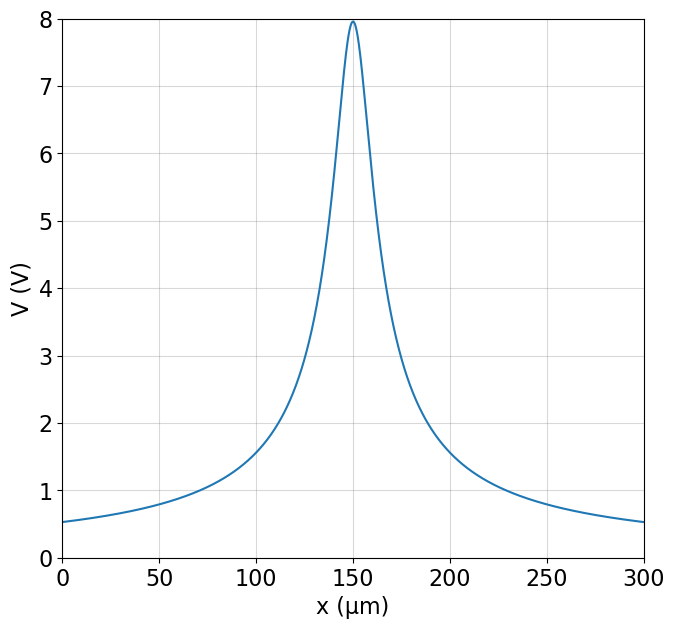

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# Constants
rho_medium = 1  # Ohm.m
I_positive = 1e-3  # A, 1mA
I_negative = -1e-3   
axon_length = 300e-6  # m 300um         直接用um的话，算出来的电压, *10e6单位就是V了   
resolution = 0.1e-6   # m 步长           um(in micrometers)    mm(millimeters)
distance_to_axon = 10e-6  # 10um, distance from the point source to the axon 
center_of_axon = axon_length / 2

# Generating the positions along the axon 生成x
positions = np.arange(0, axon_length + resolution, resolution)

# 1. potential
def calculate_potential(I, r):
    return (rho_medium * I) / (4 * np.pi * r)

# 2. electric field (negative first derivative of potential) 一阶导数
def calculate_electric_field(potentials, resolution):
    return -np.gradient(potentials, resolution)

# 3. activating function (second derivative of potential) 二阶导数
def calculate_activating_function(potentials, resolution):
    return np.gradient(np.gradient(potentials, resolution), resolution)


def calculate_values(I):
    distances = np.sqrt((positions - center_of_axon)**2 + distance_to_axon**2) # 求三角形的斜边 
    # 直接函数计算出结果
    potentials = calculate_potential(I, distances)
    electric_fields = calculate_electric_field(potentials, resolution)
    activating_functions = calculate_activating_function(potentials, resolution)
    return potentials, electric_fields, activating_functions

# Calculate for I_positive = 1 mA and I_negative = -1 mA
potentials_positive, electric_fields_positive, activating_functions_positive = calculate_values(I_positive)
potentials_negative, electric_fields_negative, activating_functions_negative = calculate_values(I_negative)

# Plotting
plt.figure(figsize=(7.5, 7))
plt.plot(positions * 1e6, potentials_positive)  
plt.xlabel('x (μm)')
plt.ylabel('V (V)')  
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.xticks(np.arange(0, 301, 50))
plt.yticks(np.arange(0, 10, 1))  
plt.xlim(0, 300) 
plt.ylim(0, 8)  
plt.rcParams.update({'font.size': 16})
plt.show()

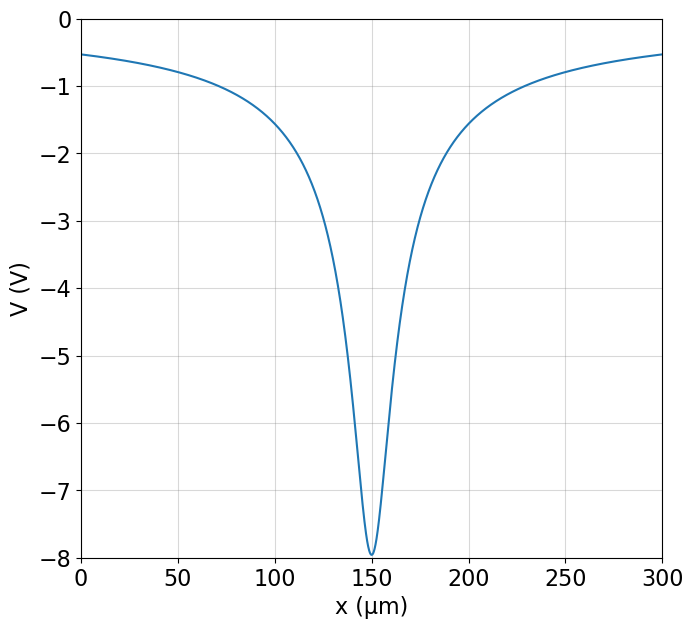

In [18]:
plt.figure(figsize=(7.5, 7))
plt.plot(positions * 1e6, potentials_negative)  
plt.xlabel('x (μm)')
plt.ylabel('V (V)')  
plt.grid(True, linestyle='-', color='grey', alpha=0.3)
plt.xticks(np.arange(0, 301, 50))
plt.yticks(np.arange(-8, 1, 1))  
plt.xlim(0, 300) 
plt.ylim(-8, 0)  
plt.rcParams.update({'font.size': 16})
plt.show()

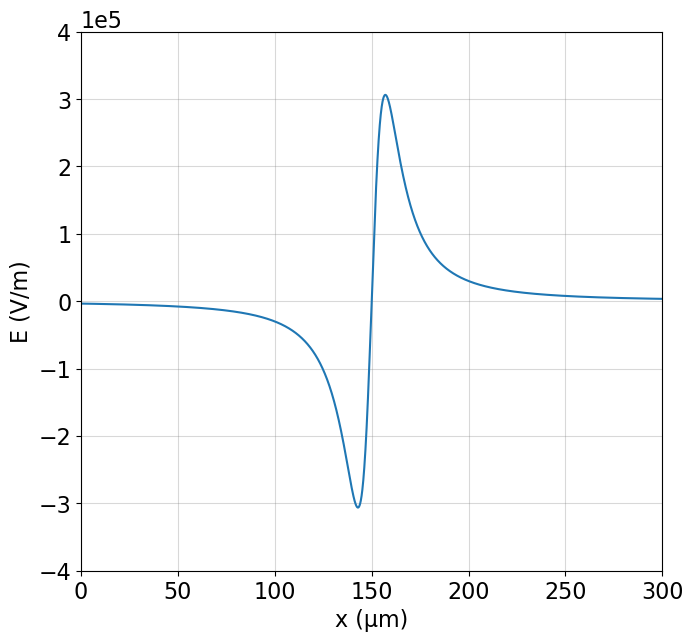

In [23]:
plt.figure(figsize=(7.5, 7))
plt.plot(positions * 1e6, electric_fields_positive)
plt.xlabel('x (μm)')
plt.ylabel('E (V/m)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)

# 设置y轴的格式化器并启用偏移
formatter = ScalarFormatter(useOffset=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))  # Adjust this if needed
plt.gca().yaxis.set_major_formatter(formatter)

y_ticks = [i * 1e5 for i in range(-4, 5)] 
plt.yticks(y_ticks)
plt.xticks(np.arange(0, 301, 50))
plt.xlim(0, 300) 

plt.rcParams.update({'font.size': 16})
plt.show()

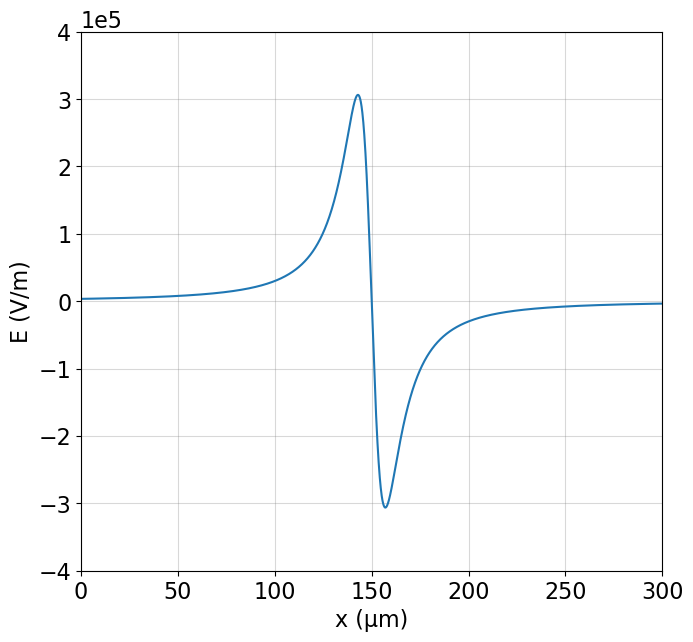

In [24]:
plt.figure(figsize=(7.5, 7))
plt.plot(positions * 1e6, electric_fields_negative)
plt.xlabel('x (μm)')
plt.ylabel('E (V/m)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)

# 设置y轴的格式化器并启用偏移
formatter = ScalarFormatter(useOffset=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))  # Adjust this if needed
plt.gca().yaxis.set_major_formatter(formatter)

y_ticks = [i * 1e5 for i in range(-4, 5)] 
plt.yticks(y_ticks)
plt.xticks(np.arange(0, 301, 50))
plt.xlim(0, 300) 

plt.rcParams.update({'font.size': 16})
plt.show()

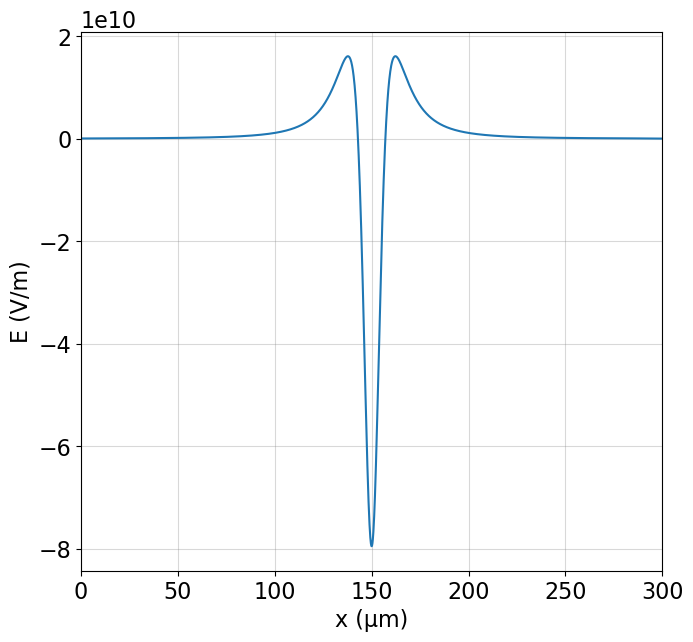

In [25]:
plt.figure(figsize=(7.5, 7))
plt.plot(positions * 1e6, activating_functions_positive)
plt.xlabel('x (μm)')
plt.ylabel('E (V/m)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)

# 设置y轴的格式化器并启用偏移
formatter = ScalarFormatter(useOffset=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))  # Adjust this if needed
plt.gca().yaxis.set_major_formatter(formatter)

y_ticks = [i * 1e10 for i in range(-8, 3, 2)] 
plt.yticks(y_ticks)
plt.xticks(np.arange(0, 301, 50))
plt.xlim(0, 300) 

plt.rcParams.update({'font.size': 16})
plt.show()

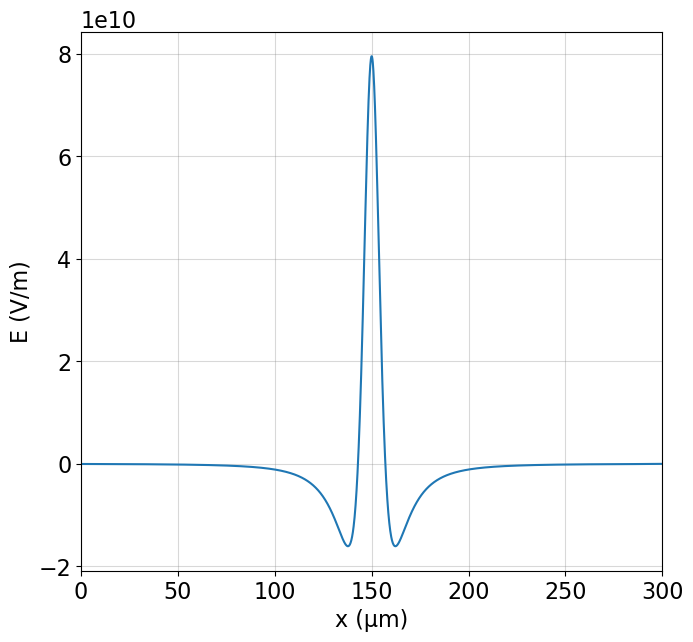

In [26]:
plt.figure(figsize=(7.5, 7))
plt.plot(positions * 1e6, activating_functions_negative)
plt.xlabel('x (μm)')
plt.ylabel('E (V/m)')
plt.grid(True, linestyle='-', color='grey', alpha=0.3)

# 设置y轴的格式化器并启用偏移
formatter = ScalarFormatter(useOffset=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))  # Adjust this if needed
plt.gca().yaxis.set_major_formatter(formatter)

y_ticks = [i * 1e10 for i in range(-2, 9, 2)] 
plt.yticks(y_ticks)
plt.xticks(np.arange(0, 301, 50))
plt.xlim(0, 300) 

plt.rcParams.update({'font.size': 16})
plt.show()

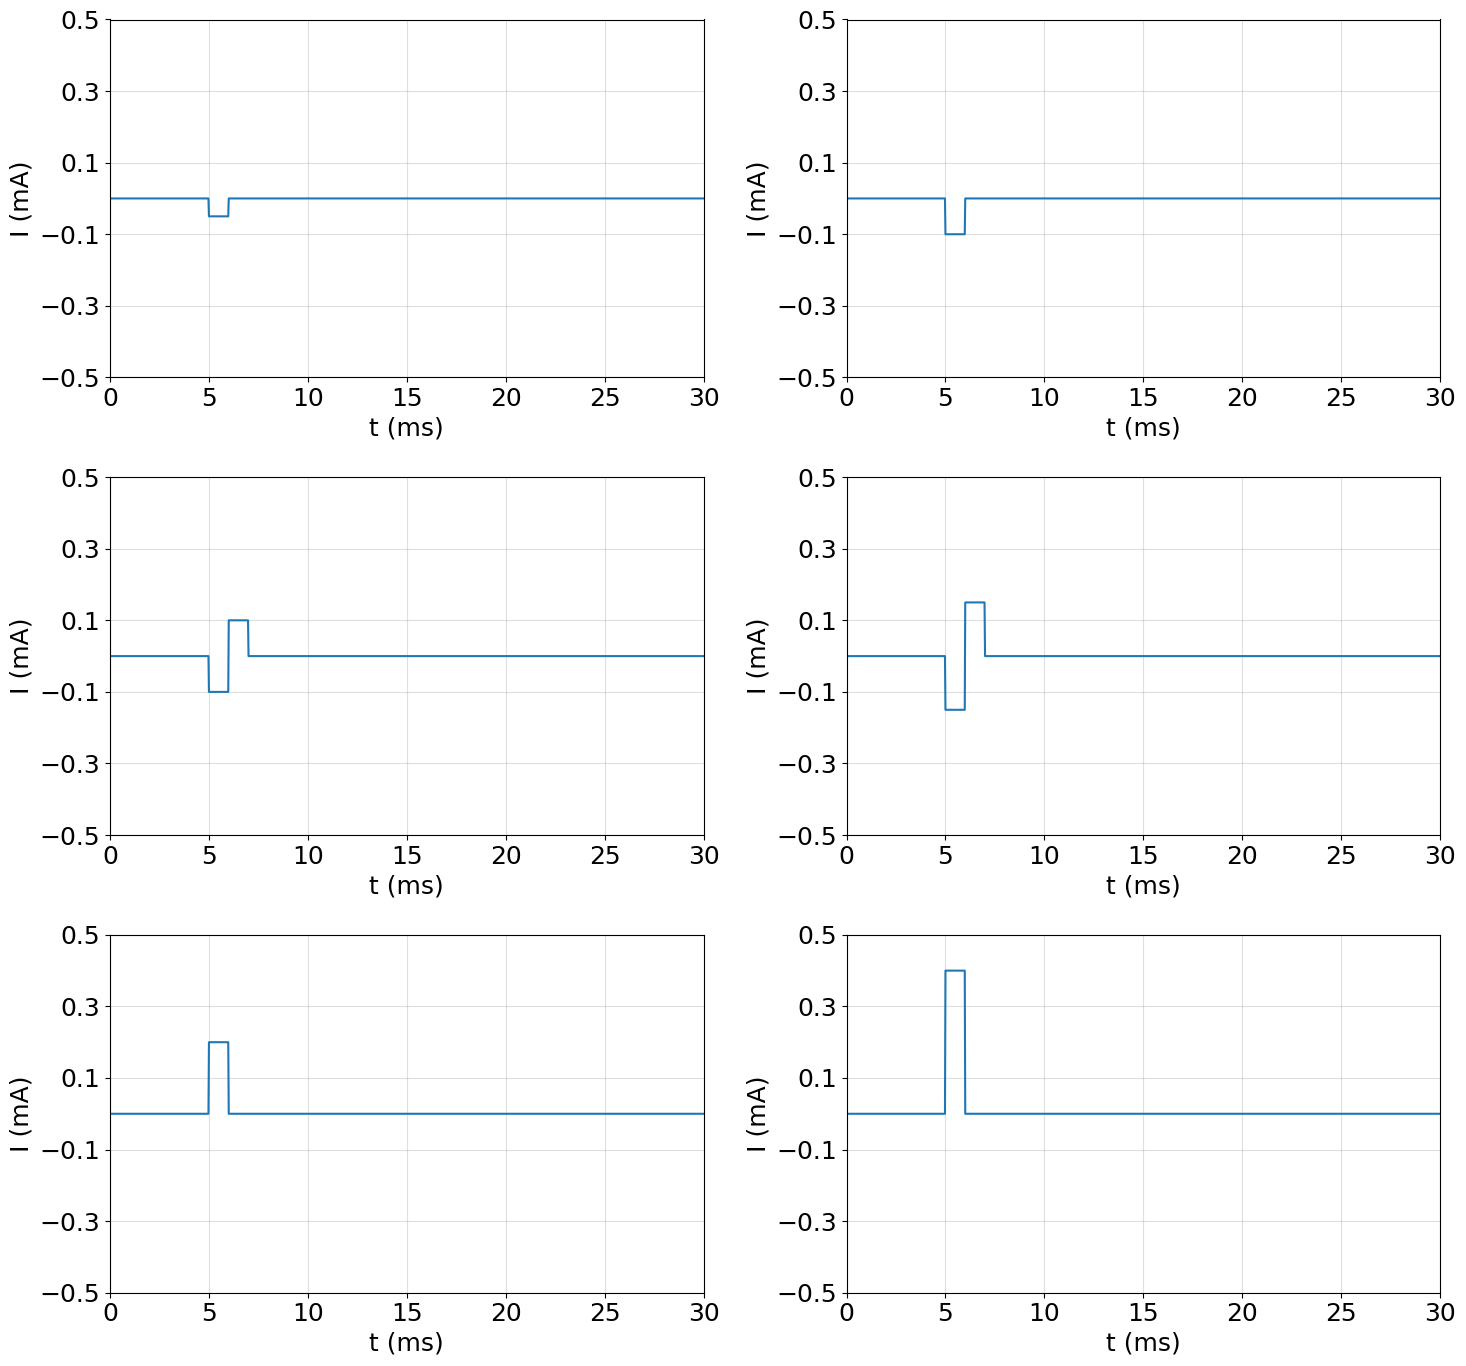

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation parameters
total_time = 30e-3  # Total simulation time in seconds
dt = 25e-6  # Time step in seconds
time = np.arange(0, total_time, dt)  # Time vector
stim_start = 5e-3  # Start time of the pulse in seconds
phase_duration = 1e-3  # Duration of the phase in seconds

# Define the stimulation sequences
stimulations = {
    'Monophasic -0.05mA': np.where((time >= stim_start) & (time < stim_start + phase_duration), -0.05e-3, 0),
    'Monophasic -0.1mA': np.where((time >= stim_start) & (time < stim_start + phase_duration), -0.1e-3, 0),
    'Biphasic ±0.1mA': np.where((time >= stim_start) & (time < stim_start + phase_duration), -0.1e-3, 
                                 np.where((time >= stim_start + phase_duration) & (time < stim_start + 2 * phase_duration), 0.1e-3, 0)),
    'Biphasic ±0.15mA': np.where((time >= stim_start) & (time < stim_start + phase_duration), -0.15e-3, 
                                  np.where((time >= stim_start + phase_duration) & (time < stim_start + 2 * phase_duration), 0.15e-3, 0)),
    'Monophasic 0.2mA': np.where((time >= stim_start) & (time < stim_start + phase_duration), 0.2e-3, 0),
    'Monophasic 0.4mA': np.where((time >= stim_start) & (time < stim_start + phase_duration), 0.4e-3, 0)
}

# Plotting the stimulation sequences
plt.figure(figsize=(15, 14))

for i, (key, value) in enumerate(stimulations.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(time * 1e3, value * 1e3)  # Convert seconds to milliseconds, Amperes to milliamperes
#     plt.title(key)
    plt.xticks(np.arange(0, 31, 5))
    plt.yticks(np.arange(-0.5, 0.6, 0.2))
    plt.xlim(0, 30)
    plt.ylim(-0.5,0.5)
    plt.xlabel('t (ms)')
    plt.ylabel('I (mA)')
    plt.grid(True, linestyle='-', color='grey', alpha=0.25)
    plt.ylim(-0.5, 0.5)  
    plt.rcParams.update({'font.size': 18}) 

plt.tight_layout()
plt.show()
